In [16]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly.express as px

In [17]:
df = pd.read_csv('meteo.csv')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    407 non-null    object 
 1   tavg    407 non-null    float64
 2   tmin    407 non-null    float64
 3   tmax    406 non-null    float64
 4   prcp    407 non-null    float64
 5   snow    1 non-null      float64
 6   wdir    406 non-null    float64
 7   wspd    406 non-null    float64
 8   wpgt    0 non-null      float64
 9   pres    406 non-null    float64
 10  tsun    0 non-null      float64
dtypes: float64(10), object(1)
memory usage: 35.1+ KB


In [19]:
df.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2022-01-02 00:00:00,4.9,-0.1,12.0,0.0,NaN,313.0,2.4,NaN,1025.3,NaN
1,2022-01-03 00:00:00,3.7,1.3,5.0,0.0,NaN,8.0,1.8,NaN,1020.6,NaN
2,2022-01-04 00:00:00,5.6,4.0,8.4,0.0,NaN,129.0,2.7,NaN,1012.4,NaN
3,2022-01-05 00:00:00,9.9,6.8,16.0,0.5,NaN,153.0,7.6,NaN,1001.7,NaN
4,2022-01-06 00:00:00,5.9,4.0,9.2,38.1,NaN,291.0,13.9,NaN,1011.9,NaN


In [20]:
df_meteo = df.drop(columns =['tmin', 'tmax', 'snow','wspd', 'wpgt', 'tsun', 'pres', 'wdir', 'tavg'])

In [21]:
df_meteo.head()

,time,prcp
0,2022-01-02 00:00:00,0.0
1,2022-01-03 00:00:00,0.0
2,2022-01-04 00:00:00,0.0
3,2022-01-05 00:00:00,0.5
4,2022-01-06 00:00:00,38.1


In [22]:
df_meteo['time'] = pd.to_datetime(df_meteo['time'])

In [23]:
df_meteo =df_meteo.set_index('time')

In [24]:
df_meteo

,prcp
time,
2022-01-02,0.0
2022-01-03,0.0
2022-01-04,0.0
2022-01-05,0.5
2022-01-06,38.1
...,...
2023-02-08,6.0
2023-02-09,1.4
2023-02-10,0.0


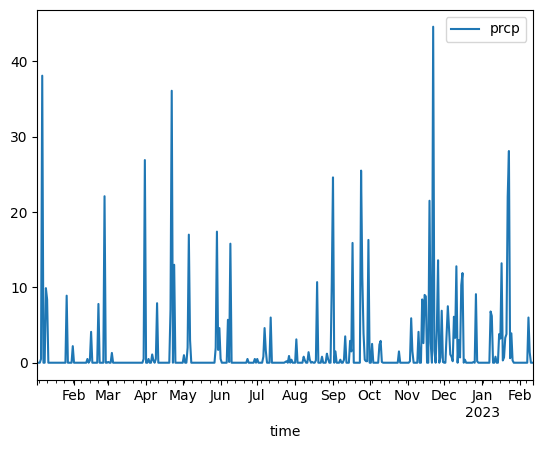

In [25]:
df_meteo.plot();

array([<Axes: xlabel='time'>], dtype=object)

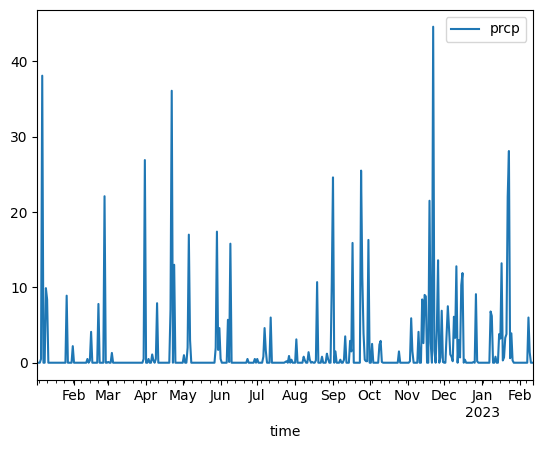

In [26]:
df_meteo.plot(subplots = True)

In [27]:
df_meteo['prcp']= df_meteo['prcp'].fillna(method = 'ffill')


C:\Users\giorg\AppData\Local\Temp\ipykernel_12064\775857906.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_meteo['prcp']= df_meteo['prcp'].fillna(method = 'ffill')


In [28]:
data = pd.read_csv('dati.csv',
                    index_col='Calendario',
                    parse_dates=True
                    )
data

df_burger=data[data['Categoria']=='Burger']
df_burger

,Categoria,Quantita
Calendario,,
2022-01-02,Burger,50
2022-01-10,Burger,1
2022-01-11,Burger,27
2022-01-12,Burger,48
2022-01-13,Burger,26
...,...,...
2023-02-08,Burger,60
2023-02-09,Burger,75
2023-02-10,Burger,117


In [29]:
df_burger = df_burger.drop(columns =['Categoria'])

In [30]:
df_unione=pd.merge(df_burger,df_meteo, how='inner', left_index=True, right_index=True)
df_unione.index.name="time"
df_unione.head()

,Quantita,prcp
time,,
2022-01-02,50,0.0
2022-01-10,1,8.4
2022-01-11,27,0.0
2022-01-12,48,0.0
2022-01-13,26,0.0


In [31]:
df_unione = df_unione.reset_index()[['time','Quantita','prcp']].rename({'time':'ds','Quantita':'y','prcp':'prcp'}, axis='columns')
df_unione

,ds,y,prcp
0,2022-01-02,50,0.0
1,2022-01-10,1,8.4
2,2022-01-11,27,0.0
3,2022-01-12,48,0.0
4,2022-01-13,26,0.0
...,...,...,...
388,2023-02-08,60,6.0
389,2023-02-09,75,1.4
390,2023-02-10,117,0.0
391,2023-02-11,152,0.0


In [32]:
df_unione['month']= df_unione['ds'].dt.month

In [33]:
df_unione[['month','prcp']].groupby('month').agg({'prcp':{'max','min','mean'}})

prcp               
        max      mean  min
month                     
1      28.1  2.157407  0.0
2      22.1  1.055000  0.0
3      26.9  0.929032  0.0
4      36.1  2.216667  0.0
5      17.4  1.570968  0.0
6      15.8  0.770000  0.0
7       6.0  0.487097  0.0
8      10.7  1.048148  0.0
9      25.5  3.616667  0.0
10      2.9  0.303226  0.0
11     44.6  4.782143  0.0
12     12.8  2.526667  0.0

In [34]:
maxs = df_unione.max()
maxs

ds       2023-02-12 00:00:00
y                        176
prcp                    44.6
month                     12
dtype: object

In [35]:
df_unione[['y','prcp']].corr()

,y,prcp
y,1.000000,0.023948
prcp,0.023948,1.000000


In [36]:
df_unione.query('prcp>26')[['y','prcp']].corr()

,y,prcp
y,1.000000,0.939763
prcp,0.939763,1.000000


In [37]:
def pioggia(prcp):
  if prcp>26:
    return 1
  else:
    return 0

In [38]:
df_unione['pioggia'] = df_unione['prcp'].apply(pioggia)
df_unione['month_bins'] = pd.cut(df_unione['month'],bins=3,labels=False)
df_unione

,ds,y,prcp,month,pioggia,month_bins
0,2022-01-02,50,0.0,1,0,0
1,2022-01-10,1,8.4,1,0,0
2,2022-01-11,27,0.0,1,0,0
3,2022-01-12,48,0.0,1,0,0
4,2022-01-13,26,0.0,1,0,0
...,...,...,...,...,...,...
388,2023-02-08,60,6.0,2,0,0
389,2023-02-09,75,1.4,2,0,0
390,2023-02-10,117,0.0,2,0,0
391,2023-02-11,152,0.0,2,0,0


In [39]:
train = df_unione[(df_unione['ds']>='2022-01-01') & (df_unione['ds']<='2022-11-30')]
test = df_unione[(df_unione['ds']>'2022-11-30')]


In [40]:
from prophet import Prophet

model = Prophet(interval_width=0.95,
                yearly_seasonality=True,
                #monthly_seasonality=True,
                weekly_seasonality=True,
                )

# add regressor
#model.add_regressor('prcp',standardize=False)
#model.add_regressor('tavg',standardize=False)


model.fit(train)

C:\Users\giorg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
17:09:07 - cmdstanpy - INFO - Chain [1] start processing
17:09:07 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
future = model.make_future_dataframe(periods=73)
future.tail()

,ds
388,2023-02-07
389,2023-02-08
390,2023-02-09
391,2023-02-10
392,2023-02-11


In [42]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
388,2023-02-07,55.216463,19.235875,95.537101
389,2023-02-08,62.080301,28.668474,99.855830
390,2023-02-09,53.441073,16.760855,87.412654
391,2023-02-10,77.788418,41.506436,114.351252
392,2023-02-11,91.821864,56.705453,127.397748


In [46]:
from prophet.plot import plot_plotly
from datetime import datetime

fig = plot_plotly(model, forecast)
fig.update_layout(
                  yaxis_title="Quantità burger",
                  xaxis_title="Data",
                  title="Burgers sold",
                  )

fig

C:\Users\giorg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\giorg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\giorg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of Da

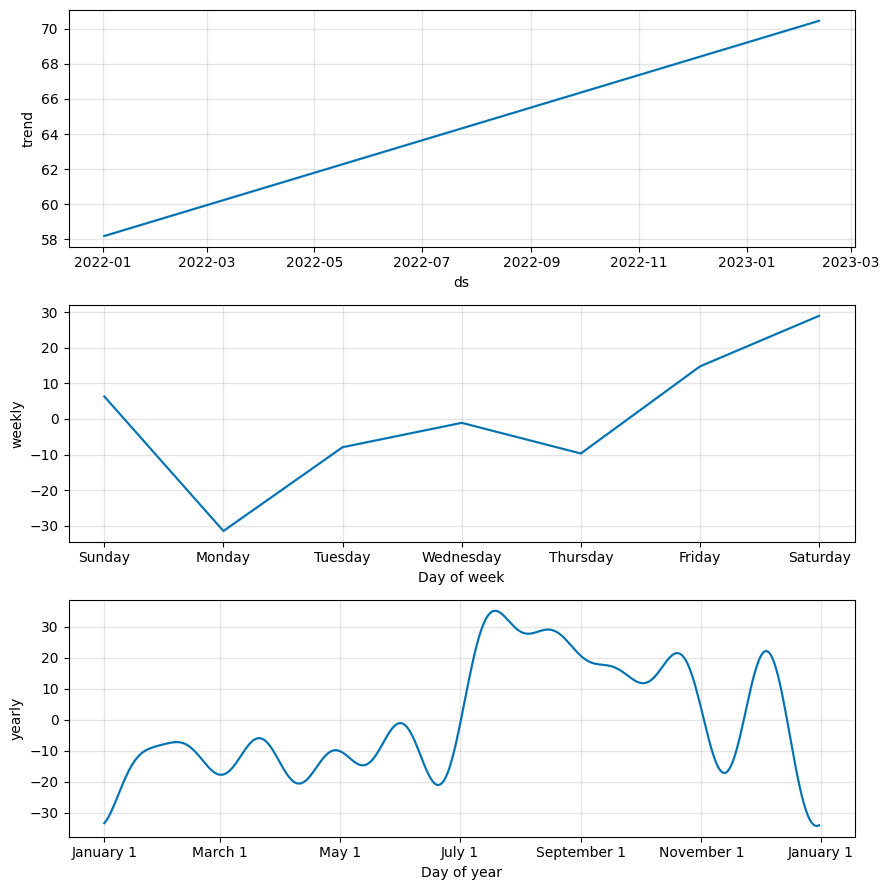

In [44]:
fig2 = model.plot_components(forecast)